In [1]:
# Step - 1: Import Necessary Libraries
import numpy as np
import pandas as pd

In [2]:
# step - 2: Loading the dataset
df=pd.read_csv("D:/retail_sales_dataset.csv")
print(df.head(10),"\n\n")
print(df.info(),"\n\n")
print(df.describe())

   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21     CUST004    Male   37         Clothing   
4               5  2023-05-06     CUST005    Male   30           Beauty   
5               6  2023-04-25     CUST006  Female   45           Beauty   
6               7  2023-03-13     CUST007    Male   46         Clothing   
7               8  2023-02-22     CUST008    Male   30      Electronics   
8               9  2023-12-13     CUST009    Male   63      Electronics   
9              10  2023-10-07     CUST010  Female   52         Clothing   

   Quantity  Price per Unit  Total Amount  
0         3              50           150  
1         2             500          1000  
2         1              30            30 

In [3]:
# Step - 3: Data Preprocessing 
# Check the missing values
print(df.isnull().sum())
# Selecting the relevant features for clustering
print(df.columns)
features=['Age','Quantity', 'Price per Unit', 'Total Amount']
# below step is used to avoid confusion with the following 
# df['Age','Quantity', 'Price per Unit', 'Total Amount']]
x=df[features]
# standardizing the data
from sklearn.preprocessing import StandardScaler

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64
Index(['Transaction ID', 'Date', 'Customer ID', 'Gender', 'Age',
       'Product Category', 'Quantity', 'Price per Unit', 'Total Amount'],
      dtype='object')


In [4]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler[:5]

array([[-0.54056476,  0.42926498, -0.68512265, -0.5467043 ],
       [-1.12559156, -0.45399629,  1.68846418,  0.97191876],
       [ 0.62948884, -1.33725757, -0.7906154 , -0.76109815],
       [-0.32117971, -1.33725757,  1.68846418,  0.07861108],
       [-0.83307816, -0.45399629, -0.68512265, -0.63603507]])

In [5]:
# Step-4 : Determine the optimal no of clusters
from sklearn.cluster import KMeans

In [6]:
wcss = []
for i in range(1, 11):
    k = KMeans(n_clusters=i, init='k-means++', random_state=42)
    k.fit(x_scaler)
    wcss.append(k.inertia_)



C:\Users\hiihe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hiihe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hiihe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\hiihe\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

In [7]:
wcss
# Within Clusters Sum Squares : measures how tightly the data points clustered around centroids


[4000.0000000000005,
 2413.7255623331757,
 1919.3355084889329,
 1471.7800268965707,
 1363.2210426652007,
 1051.1158739402479,
 929.6545052649501,
 849.1440531776676,
 836.7598485823006,
 657.0692536445782]

In [8]:
a = []
for i in range(1, 10):
    print(i)
    print(a.append(i))


1
None
2
None
3
None
4
None
5
None
6
None
7
None
8
None
9
None


In [9]:
# Plot elbow method
import matplotlib.pyplot as plt

AttributeError: Line2D.set() got an unexpected keyword argument 'maker'

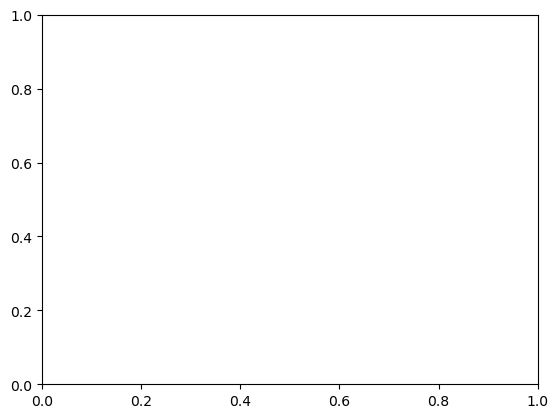

In [10]:
plt.plot(range(1,11),wcss,maker='o')

In [ ]:
# Step - 5: KMeans Clustering 
Kmeans=KMeans(n_clusters=3,init="k-means++",random_state=42)
df['Cluster']=kmeans.fit_predict(x_scaler)
df.head()

In [ ]:
# step -6 : Visualizing clusters using PCA
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(x_scaler)
x_pca[:5]

In [ ]:
x_pca[:,0][:5]

In [ ]:
df['PCA1']=x